# Project Name: Music Words Slap
##### Author: Cole Gaito
- Student at University of Colorado Boulder
##### Project Parts
- Part 1 (Team & Topic Dataset): See: *Group2_MusicWordsSlap_Part1.pdf* https://github.com/gaitocole/Final_Project/tree/main
- Part 2 (Project Proposal Paper): See: *Group2_MusicWordsSlap_Part2.pdf* https://github.com/gaitocole/Final_Project/tree/main
- Part 3 (Project Progress Report): See: *Group2_MusicWordsSlap_Part3.pdf* https://github.com/gaitocole/Final_Project/tree/main
- Part 4 (Project Final Report):
- Part 5 (Project Code and Descriptions): 
- Part 6 (Project Presentation):
- Part 7 (Peer Evaluation & Interview Questions): See: *Group2_MusicWordsSlap_Part7.pdf* https://github.com/gaitocole/Final_Project/tree/main
##### Links 
- GitHub Project URL: https://github.com/gaitocole/Final_Project/tree/main 
- GitHub Code & Data URL: https://github.com/gaitocole/Final_Project/tree/main/Music_Trends


In [1]:
#Initial test script to validate that the Python Kernel is working
print("Hello, World!")

Hello, World!


In [2]:
#Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Test to see if the packages are loaded
print("Packages Loaded!")

Packages Loaded!


In [3]:
#Import of Data Set from charts.csv, which holds all the data for the project
df = pd.read_csv('charts.csv')
print(df.head())

       date  rank                Song                               Artist  \
0  10/12/24     1  A Bar Song (Tipsy)                            Shaboozey   
1  10/12/24     2  Birds Of A Feather                        Billie Eilish   
2  10/12/24     3            Timeless           The Weeknd & Playboi Carti   
3  10/12/24     4     I Had Some Help  Post Malone Featuring Morgan Wallen   
4  10/12/24     5            Espresso                    Sabrina Carpenter   

                                  Concat Song/Artist  last-week  peak-rank  \
0                      A Bar Song (Tipsy), Shaboozey        1.0          1   
1                  Birds Of A Feather, Billie Eilish        6.0          2   
2               Timeless, The Weeknd & Playboi Carti        0.0          3   
3  I Had Some Help, Post Malone Featuring Morgan ...        2.0          1   
4                        Espresso, Sabrina Carpenter        3.0          3   

   weeks-on-board                                         Lyri

/var/folders/57/x0v59fzn1cd1_vltg3v6p9bc0000gn/T/ipykernel_28790/597270096.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('charts.csv')


In [4]:
print(df.describe())

                rank      last-week      peak-rank  weeks-on-board  \
count  345387.000000  312926.000000  345387.000000   345387.000000   
mean       50.500887      47.185897      40.585804        9.319534   
std        28.866093      28.218618      29.323824        7.918380   
min         1.000000       0.000000       1.000000        1.000000   
25%        26.000000      23.000000      13.000000        4.000000   
50%        51.000000      46.000000      38.000000        7.000000   
75%        76.000000      71.000000      65.000000       13.000000   
max       100.000000     100.000000     100.000000       91.000000   

       Artist Popularity  Total Tracks in Album  
count      311738.000000          311738.000000  
mean           50.988231              12.629432  
std            28.418204              12.191572  
min             0.000000               0.000000  
25%            35.000000               9.000000  
50%            58.000000              12.000000  
75%            72.0

rank has 100 unique values.
last-week has 101 unique values.
peak-rank has 100 unique values.
weeks-on-board has 91 unique values.
Artist Popularity has 98 unique values.
Total Tracks in Album has 124 unique values.


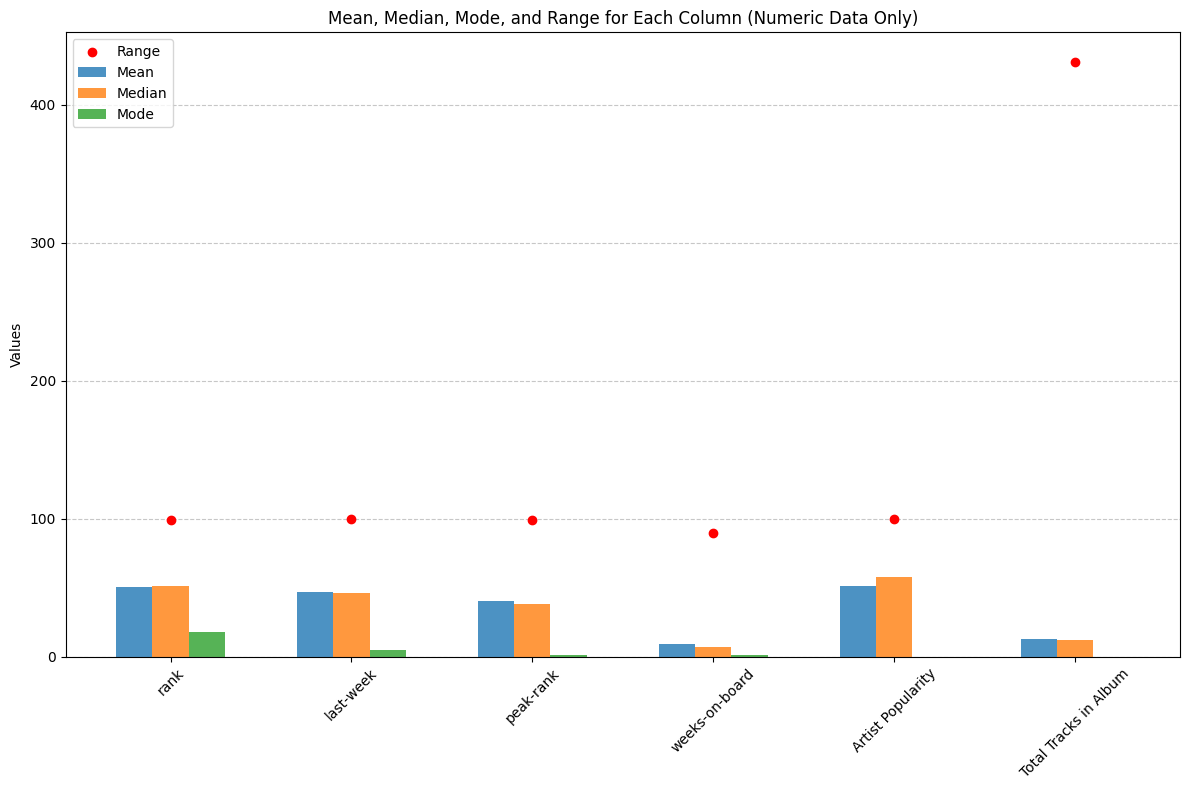

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

for each in numeric_df.columns:
    print(f"{each} has {numeric_df[each].nunique()} unique values.")

# Use describe for key metrics
summary = numeric_df.describe()

# Extract statistics
mean = summary.loc['mean']
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # Take the first mode
data_range = summary.loc['max'] - summary.loc['min']

# Plotting
plt.figure(figsize=(12, 8))

x = np.arange(len(mean))  # x-axis positions for the columns
width = 0.2  # Width for the bars

# Overlay the metrics
plt.bar(x - width, mean, width, label='Mean', alpha=0.8)
plt.bar(x, median, width, label='Median', alpha=0.8)
plt.bar(x + width, mode, width, label='Mode', alpha=0.8)
plt.scatter(x, data_range, color='red', label='Range', zorder=5)  # Range as scatter points

# Customizing the plot
plt.xticks(x, mean.index, rotation=45)  # Set column names on x-axis
plt.ylabel('Values')
plt.title('Mean, Median, Mode, and Range for Each Column (Numeric Data Only)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


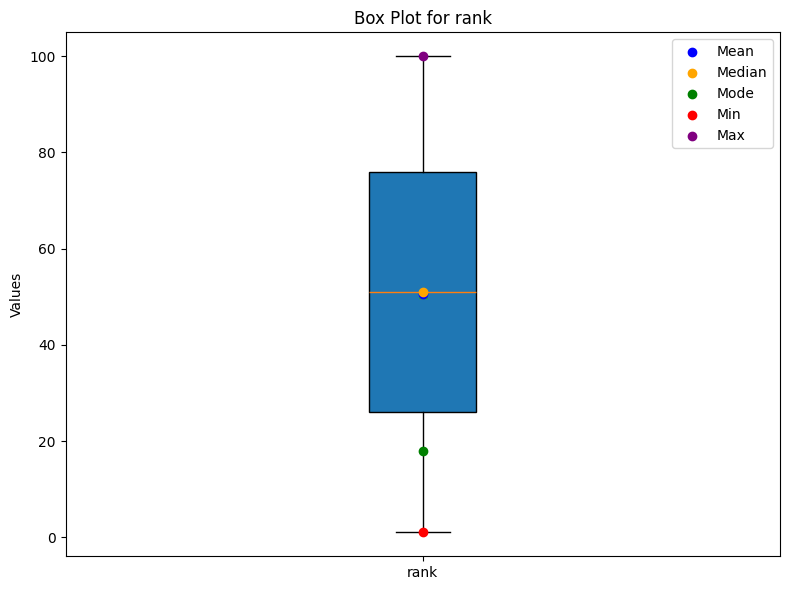

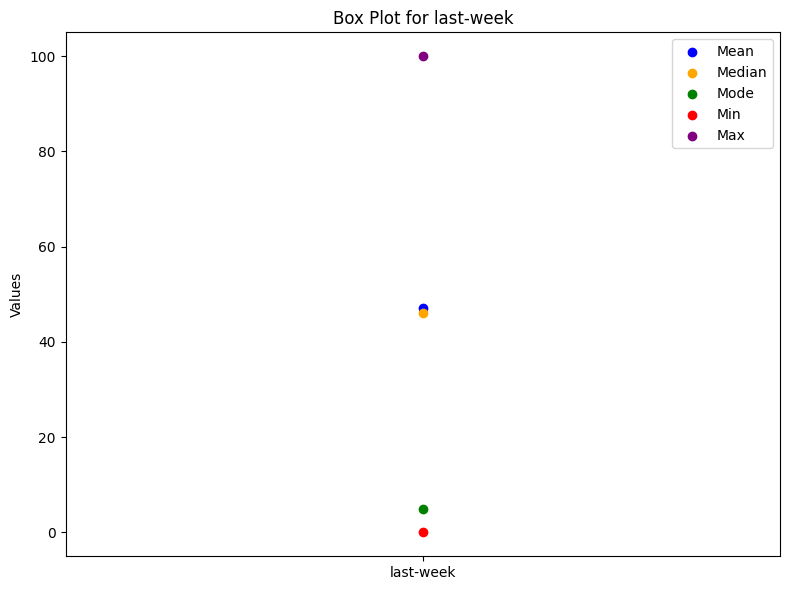

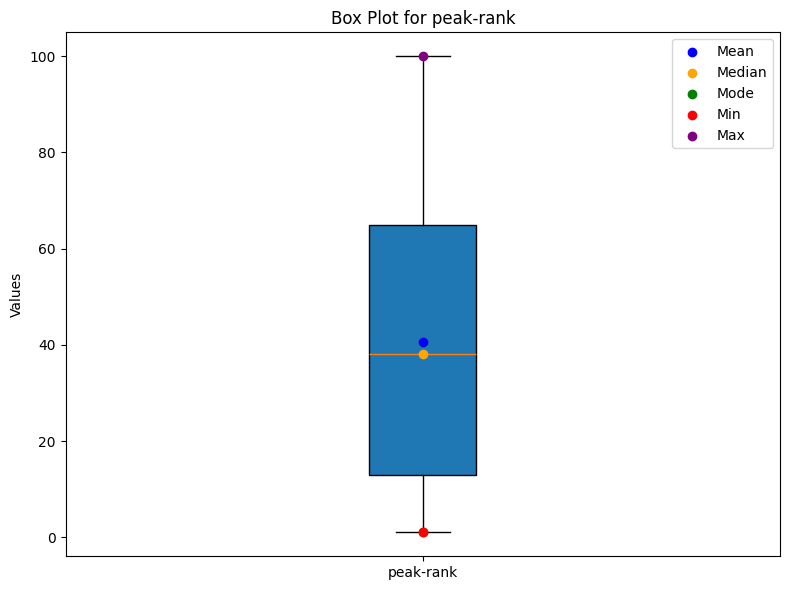

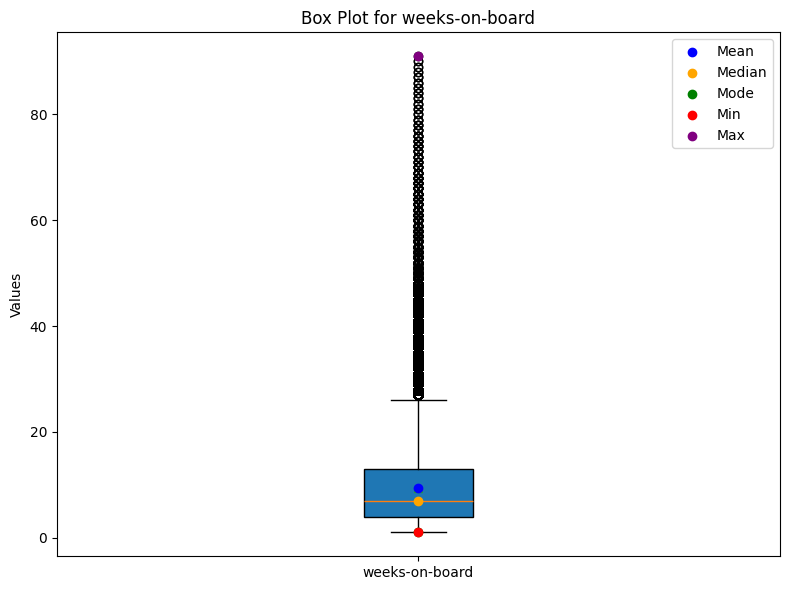

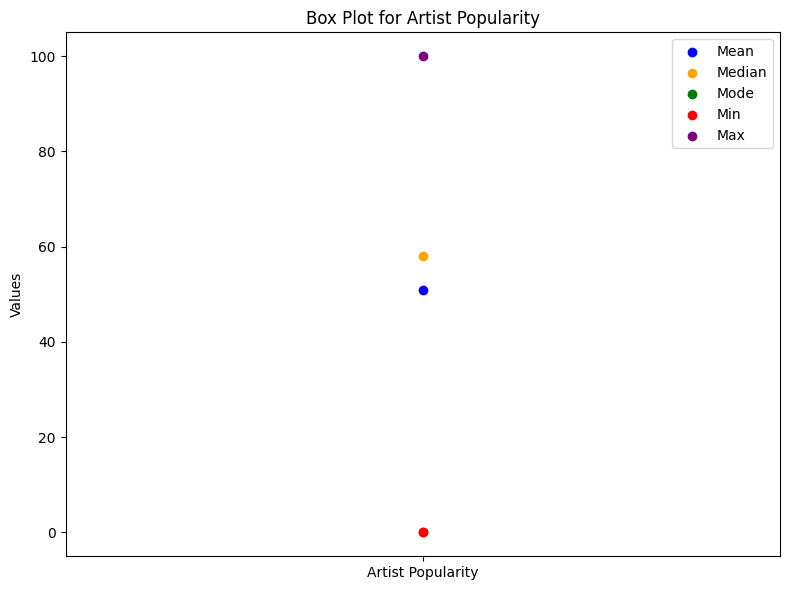

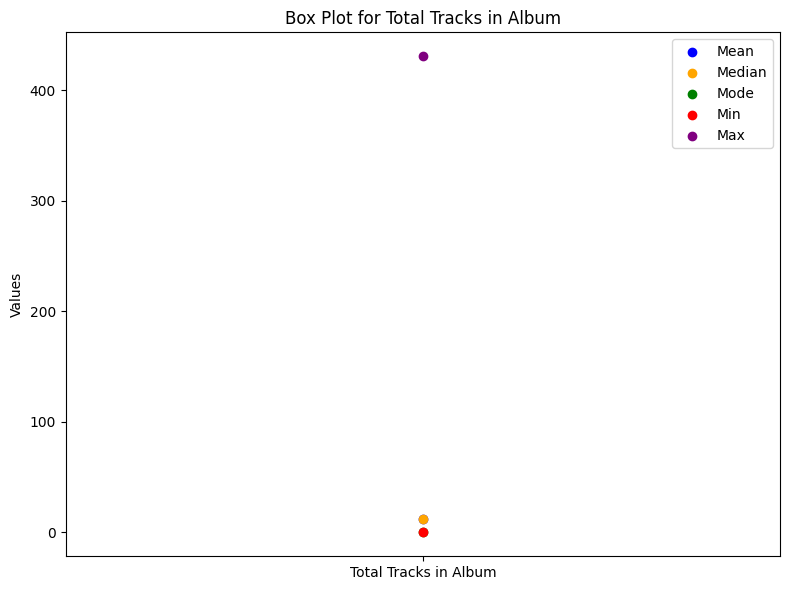

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Use describe for key metrics
summary = numeric_df.describe()

# Extract statistics
mean = summary.loc['mean']
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # Take the first mode
data_range = summary.loc['max'] - summary.loc['min']

# Create individual plots for each column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))

    # Create box plot for the column
    plt.boxplot(numeric_df[column], vert=True, patch_artist=True, showmeans=True, meanline=False)

    # Annotate statistics
    plt.scatter(1, mean[column], color='blue', label='Mean', zorder=5)
    plt.scatter(1, median[column], color='orange', label='Median', zorder=5)
    plt.scatter(1, mode[column], color='green', label='Mode', zorder=5)
    plt.scatter(1, summary.loc['min', column], color='red', label='Min', zorder=5)
    plt.scatter(1, summary.loc['max', column], color='purple', label='Max', zorder=5)

    # Customize plot
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.xticks([1], [column])
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [7]:
print(df.columns)

Index(['date', 'rank', 'Song', 'Artist', 'Concat Song/Artist', 'last-week',
       'peak-rank', 'weeks-on-board', 'Lyrics Url', 'Lyrics',
       'Track Popularity', 'Track Explicit', 'Album', 'Album Release Date',
       'Artist Popularity', 'Artist Genres', 'Track ID',
       'Total Tracks in Album'],
      dtype='object')


In [12]:
import nltk
from nltk.tokenize import word_tokenize

nltk.data.path = ["/Users/gaitoc/nltk_data"]

try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is already available.")
except LookupError:
    print("Punkt tokenizer is not found. Downloading it...")
    nltk.download('punkt', download_dir="/Users/gaitoc/nltk_data")



text = "Hello, this is a test sentence."
tokens = word_tokenize(text)
print("Tokens:", tokens)



Punkt tokenizer is already available.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/gaitoc/nltk_data'
**********************************************************************


In [10]:
import nltk
nltk.data.path = ["/Users/gaitoc/nltk_data"]
nltk.download('punkt', download_dir='/Users/gaitoc/nltk_data')

[nltk_data] Downloading package punkt to /Users/gaitoc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
ls /Users/gaitoc/nltk_data/tokenizers/punkt

ls: /Users/gaitoc/nltk_data/tokenizers/punkt: No such file or directory


In [ ]:
dict = {}
for each in df["Concat Song/Artist"]:
    #print(each)
    if each in dict:
        dict[each] += 1
    else:
        dict[each] = 1

for each in df["Lyrics"]:
    print(each)
    word_tokenize = nltk.word_tokenize(each)
    print(word_tokenize)



# Print the dictionary
print(dict)

In [ ]:
import string
import nltk
nltk.download('punkt_tab')
print(Word_Count)





In [ ]:
df['tokens'] = df['Lyrics'].apply(word_tokenize)
word_freq = Counter([word for song in df['tokens'] for word in song])
print(word_freq.most_common(10))